<a href="https://colab.research.google.com/github/menah72008-ux/Project_AI-V1/blob/main/v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


في مرحلة  الاولى استكشف البيانات لفحص المعلومات المالية والتأكد من جودة البيانات واكتمالها قبل البدء بعملية التنظيف سأقوم بمراجعة الاعمدة وانواعها وعدد القيم الفارغة والمكررة واستخراج الاحصائيات الاساسية للبيانات لتحديد اي مشاكل  محتملة وضمان تجهيز البيانات بشكل صحيح للمرحلة التالية من التحليل والتنبؤ


---



In [1]:
# استدعاء المكتبات
import pandas as pd
import numpy as np



---


ربط Google Drive الوصول إلى ملف البيانات المخزن عليه

---

In [2]:
from google.colab import drive # ربط مع السحابة
drive.mount('/content/drive')

Mounted at /content/drive




---

قراءة الملف لتعرف على البيانات الموجودة فيه


---



In [3]:
df=pd.read_csv("/content/drive/MyDrive/IA project/company_esg_financial_dataset.csv") # قراءة الملف



---


تم عرض أول وآخر الصفوف من البيانات باستخدام head و tail  
 بهدف فهم بنية البيانات
والتأكد من تحميلها بشكل صحيح قبل البدء بعملية التنظيف والمعالجة

---



In [4]:
df.head() # عرض أول خمس صفوف من البيانات

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [5]:
df.tail() # عرض اخر خمس صفوف من البيانات

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3
10999,1000,Company_1000,Consumer Goods,Latin America,2025,3173.5,17.5,5666.1,-0.3,51.8,74.5,39.7,41.4,430741.6,538427.0,2153707.9



---
عرض معلومات عامة عن البيانات مثل أسماء الأعمدة وأنواعها وعدد القيم غير الفارغة


---



In [6]:
df.info() # معلومات عن الأعمدة ونوع البيانات وعدد القيم الغائبة

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [7]:
# طباعة عدد الصفوف والأعمدة في مجموعة البيانات
print(f'Namber of rows: {df.shape[0]}')
print(f'Namber of columns: {df.shape[1]}')

Namber of rows: 11000
Namber of columns: 16




---


عرض إحصائيات وصفية للبيانات العددية مثل المتوسط والانحراف المعياري والقيم  


---



In [8]:
df.describe() # إحصائيات وصفية للبيانات العددية

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09




---


التحقق من عدد القيم الفارغة في
كل عمود لمعرفة إن كان هناك بيانات ناقصة تحتاج معالجة


---



In [9]:
print(df.isnull().sum())# التحقق من القيم الفارغة في كل عمود

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64




---


 التحقق من صفوف مكررة في البيانات


---



In [10]:
has_dupicates=df.duplicated().any()# التحقق من التكرار في البيانات
print(f'Has dupicates: {has_dupicates}')

Has dupicates: False




---

ثاني خطوة هي التنظيف يتم معالجة القيم  المفقدوة من  عامود (GrowthRate)      
تمت معالجة القيم المفقودة باستخدام الوسيط بدلا من المتوسط وذلك لتقليل تأثير القيم المتطرفة المحتملة في البيانات المالية وضمان الحصول على تقديرات أكثر دقة


---





In [11]:
df['GrowthRate'].fillna(df['GrowthRate'].median(), inplace=True)# استبدال القيم الفارغة الوسيط

/tmp/ipython-input-691037841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GrowthRate'].fillna(df['GrowthRate'].median(), inplace=True)# استبدال القيم الفارغة الوسيط




---

التأكد من تعوض القيم المفقودة


---



In [12]:
print(df.isnull().sum())# التحقق من القيم الفارغة في كل عمود

CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64




---


سيتم في هذه المرحلة حذف الأعمدة غير المهمة التي لا تؤثر في عملية التنبؤ مثل معرف الشركة واسم الشركة وذلك لتحسين جودة البيانات وتجهيزها لمرحلة تدريب نموذج الذكاء الاصطناعي


---



In [13]:
print(df.columns)# طباعة أسماء الأعمدة في البيانات

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')


In [14]:
# حذف الأعمدة غير المهمة
df.drop(['CompanyID', 'CompanyName'], axis=1, inplace=True)



---
طباعة اسماء الاعمدة البيانات لتاكد من الحذف


---




In [15]:
print(df.columns)

Index(['Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap',
       'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social',
       'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'],
      dtype='object')




---

سأستخدم df.dtypes

لتأكد من نوع البيانات كل عمود

---



In [16]:
df.dtypes

,0
Industry,object
Region,object
Year,int64
Revenue,float64
ProfitMargin,float64
MarketCap,float64
GrowthRate,float64
ESG_Overall,float64
ESG_Environmental,float64
ESG_Social,float64




---


تم تحويل الأعمدة النصية (Industry و Region) إلى قيم رقمية

باستخدام أسلوب
Label Encoding

وذلك لتجهيز البيانات لتدريب نموذج التعلم الآلي مع الحفاظ على أسماء الأعمدة الأصلية


---



In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Industry'] = le.fit_transform(df['Industry'])
df['Region'] = le.fit_transform(df['Region'])



---
التأكد من تحويل نوع البينات


---




In [18]:
df.dtypes

,0
Industry,int64
Region,int64
Year,int64
Revenue,float64
ProfitMargin,float64
MarketCap,float64
GrowthRate,float64
ESG_Overall,float64
ESG_Environmental,float64
ESG_Social,float64




---
بعد الانتهاء من مرحلة استكشاف البيانات وفحصها والتأكد من جودتها تم تنفيذ خطوات تنظيف البيانات ومعالجة القيم المفقودة وتحويل المتغيرات النصية وبذلك أصبحت البيانات جاهزة للاستخدام في بناء النماذج والانتقال إلى مرحلة تطبيق خوارزميات التعلم الآلي لإجراء عملية التنبؤ وتحليل النتائج


---




In [19]:
print(df.columns)

Index(['Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap',
       'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social',
       'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption'],
      dtype='object')


In [20]:
# تحديد المتغيرات المستقلة (Features) التي ستستخدم كمدخلات للنموذج
featuers=['Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin',
       'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social',
       'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']
X=df[featuers] # تحديد X (المدخلات)
Y=df['MarketCap'] # تحديد Y (المخرج وهو السعر)
print(X.shape) # طباعة أبعاد بيانات X
print(Y.shape) # طباعة أبعاد بيانات Y

(11000, 13)
(11000,)


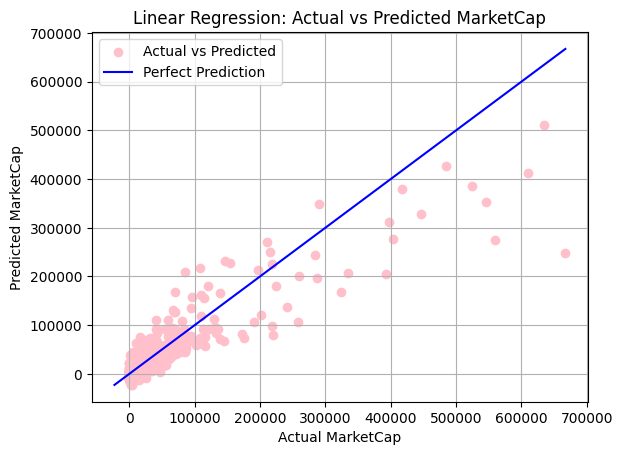

In [21]:
# استيراد مكتبات التعلم الآلي اللازمة
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# تقسيم البيانات إلى تدريب (80%) واختبار (20%)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42) # تقسيم البيانات إلى تدريب واختبار
model = LinearRegression()# إنشاء نموذج الانحدار الخطي
model.fit(X_train,Y_train) # تدريب النموذج باستخدام بيانات التدريب
y_pred = model.predict(X_test) # التنبؤ باستخدام بيانات الاختبار
# تحديد أقل وأكبر قيمة لعرض خط التوقع المثالي
min_val = min(Y_test.min(), y_pred.min())
max_val = max(Y_test.max(), y_pred.max())
# رسم القيم الحقيقية مقابل القيم المتوقعة
plt.scatter(Y_test, y_pred, color='pink', label='Actual vs Predicted')
plt.plot([min_val, max_val], [min_val, max_val], color='blue', label='Perfect Prediction')
plt.xlabel('Actual MarketCap')
plt.ylabel('Predicted MarketCap')
plt.title('Linear Regression: Actual vs Predicted MarketCap')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score # حساب الخطأ
y_pred = model.predict(X_test) # التنبؤ بأسعار بيانات الاختبار
mse = mean_squared_error(Y_test, y_pred) # حساب متوسط مربع الخطأ
r2 = r2_score(Y_test, y_pred)# حساب معامل التحديد R2
 # طباعة نتائج الخطأ
print(f"Mean Squared Error(MSE): {mse}")
print("R2 Score:", r2)

Mean Squared Error(MSE): 402260604.7003668
R2 Score: 0.8152732297892372
